# **Create spatial data, web map it, reproject it and export it with Python**

## **Create a spatial point layer from coordinates in a .csv file**


Import the pandas library as pd and also the geopandas library:

In [1]:
import pandas as pd
import geopandas

Read in a .csv file with pandas' `read_csv()` function entering the name of the file (.csv):

In [2]:
infile = input("input merged file: ")
xy_table = pd.read_csv(infile)

The `xy_table` DataFrame has two columns with x- and y-coordinates ('Stn_long' and 'Stn_lat', respectively):

In [3]:
xy_table.head()

,RecordID,StationName,DateTime,DateTimeString,Rain,Precipitation,AirTemperature,RelativeHumidity,WindSpeed,WindDirection,...,MFuel,TFuel,Rn_1,Wspd_1,Mx_Dir,Mx_Spd,TMax,TMin,RhMax,RhMin
0,14G+20221031220000,14g,44865.91667,2.022100e+13,0.0,0.0,2.7,96,9.6,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31N+20221031220000,31n,44865.91667,2.022100e+13,0.0,-9999.0,1.2,98,16.4,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4RW6+20221031220000,4rw6,44865.91667,2.022100e+13,0.0,-0.1,1.9,79,16.8,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chris_Creek+20221031220000,chris_creek,44865.91667,2.022100e+13,0.0,-0.1,-0.3,98,5.3,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Martins_Gulch+20221031220000,martins_gulch,44865.91667,2.022100e+13,0.0,0.0,2.1,92,7.8,264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To create a points layer from the `xy_table` first put the coordinate values together in one column ('coordinates'):

* Select the 'Stn_long' and 'Stn_lat' columns from `xy_table`
* Extract the `values` from the two columns as an array 
* Convert the values array to list

In [4]:
xy_table['coordinates'] = xy_table[['Stn_long', 'Stn_lat']].values.tolist()
xy_table.head()

,RecordID,StationName,DateTime,DateTimeString,Rain,Precipitation,AirTemperature,RelativeHumidity,WindSpeed,WindDirection,...,TFuel,Rn_1,Wspd_1,Mx_Dir,Mx_Spd,TMax,TMin,RhMax,RhMin,coordinates
0,14G+20221031220000,14g,44865.91667,2.022100e+13,0.0,0.0,2.7,96,9.6,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-123.614722, 48.494167]"
1,31N+20221031220000,31n,44865.91667,2.022100e+13,0.0,-9999.0,1.2,98,16.4,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-123.63861100000001, 48.52944]"
2,4RW6+20221031220000,4rw6,44865.91667,2.022100e+13,0.0,-0.1,1.9,79,16.8,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-123.75111100000001, 48.585833]"
3,Chris_Creek+20221031220000,chris_creek,44865.91667,2.022100e+13,0.0,-0.1,-0.3,98,5.3,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-123.840556, 48.580278]"
4,Martins_Gulch+20221031220000,martins_gulch,44865.91667,2.022100e+13,0.0,0.0,2.1,92,7.8,264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-123.76443799999998, 48.51616]"


Change each record in the 'coordinates' column in `xy_table` to class Point:
*  Import the Point class from the geometry module in the shapely library
*  Then run `apply()` to change the coordinates to class Point

In [5]:
from shapely.geometry import Point
xy_table['coordinates'] = xy_table['coordinates'].apply(Point)
xy_table.head()

,RecordID,StationName,DateTime,DateTimeString,Rain,Precipitation,AirTemperature,RelativeHumidity,WindSpeed,WindDirection,...,TFuel,Rn_1,Wspd_1,Mx_Dir,Mx_Spd,TMax,TMin,RhMax,RhMin,coordinates
0,14G+20221031220000,14g,44865.91667,2.022100e+13,0.0,0.0,2.7,96,9.6,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-123.614722 48.494167)
1,31N+20221031220000,31n,44865.91667,2.022100e+13,0.0,-9999.0,1.2,98,16.4,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-123.638611 48.52944)
2,4RW6+20221031220000,4rw6,44865.91667,2.022100e+13,0.0,-0.1,1.9,79,16.8,231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-123.751111 48.585833)
3,Chris_Creek+20221031220000,chris_creek,44865.91667,2.022100e+13,0.0,-0.1,-0.3,98,5.3,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-123.840556 48.580278)
4,Martins_Gulch+20221031220000,martins_gulch,44865.91667,2.022100e+13,0.0,0.0,2.1,92,7.8,264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-123.764438 48.51616)


`xy_table` is still a pandas DataFrame:

In [6]:
type(xy_table)

pandas.core.frame.DataFrame

To convert `xy_table` to a spatial object use the `GeoDataFrame` constructor from geopandas entering the DataFrame and the column with the geometry data as inputs:

In [7]:
stations = geopandas.GeoDataFrame(xy_table, geometry = 'coordinates')
type(stations)

geopandas.geodataframe.GeoDataFrame

Plot the `stations` GeoDataFrame (static plot):

<AxesSubplot:>

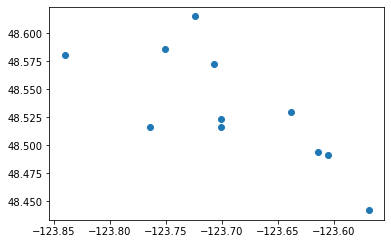

In [8]:
stations.plot()

## **Display a point layer in a leaflet-based web map**

A web map can be easily created with the folium library. 

For instructions on installing folium visit: https://python-visualization.github.io/folium/installing.html#installation

After installation import the folium library:

In [9]:
import folium

To create a leaflet web map use `folium.Map()` entering a list with latitude and longitude coordinates for the 'location' parameter (note that the order is [lat,long], not [long,lat]).

For example enter the average values for the 'LATITUD' and 'LONGITUD' columns in the `stations` GeoDataFrame (optionally enter a starting zoom level):

In [10]:
osm_map = folium.Map(location=[stations.Stn_lat.mean(), stations.Stn_long.mean()], zoom_start=4)
osm_map

To add a GeoDataFrame to the folium map, create a GeoJSON representation of the GeodataFrame, and then use `folium.features.GeoJson()` to create a GeoJson object for plotting into the map:

In [11]:
points = folium.features.GeoJson(stations.to_json())

Then add the GeoJson object called `points` to the `map_osm` map with `add_child()`: 

In [12]:
osm_map.add_child(points)
osm_map

## **Reproject a spatial layer with Python**

To reproject a layer, the layer must have its coordinate reference system (CRS) defined, otherwise it's not possible to do the reprojection.

Check whether the GeoDataFrame has a defined CRS:

In [13]:
stations.crs

In [14]:
stations.crs is None

True

If a layer does not have a CRS defined yet, use the `set_crs()` method to define it appropriately: 

In [15]:
stations = stations.set_crs(4326)
stations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Reproject the `stations` layer to a different CRS using `to_crs()` for example entering an EPSG code for the desired reprojection (e.g., 'EPSG:3117'):

In [16]:
#stations_epsg3117 = stations.to_crs('EPSG:3117')
#stations_epsg3117.crs

## **Export a GeoDataFrame to common GIS formats**

Use the `to_file()` method from geopandas to write a GeoDataFrame to a file in any of more than 20 possible formats including GeoPackage, GeoJSON, GML, ESRI Shapefile, and others:

In [17]:
stations.to_file('exported_file.shp')

<ipython-input-17-9fa353121651>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stations.to_file('exported_file.shp')
